## IAA Laboratori 1 - Llibreries de Python

<div class="alert alert-block alert-info">

**INSTRUCCIONS**

No cal entregar res, cal assimilar

S'ha de fer amb calma, sense córrer, mirant d'entendre en tot moment què s'està fent **a nivell conceptual** i quin efecte té

 Podeu deixar el codi python en si (crides, paràmetres, sintaxi) per una segona lectura o com a treball personal. El codi python és un mitjà, no un objectiu.
 
</div>

In [1]:
# Uncomment to upgrade packages
%pip install --upgrade pip  --quiet
%pip install pandas  --upgrade --quiet
%pip install numpy  --upgrade --quiet
%pip install scipy  --upgrade --quiet
%pip install statsmodels  --upgrade --quiet
%pip install seaborn  --upgrade --quiet
%pip install scikit-learn --upgrade --quiet
%pip install tqdm ipykernel matplotlib ipywidgets --upgrade --quiet   

%load_ext autoreload

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aima 2023.2.6 requires pandas<2.0,>=1.5, but you have pandas 2.2.3 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.1.1 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
import warnings


InteractiveShell.ast_node_interactivity = "all"
#pd.set_option('precision', 3)
display.precision = 3
sns.set()
warnings.filterwarnings('ignore')

In [3]:
# extra imports
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox

In [4]:
pd.__version__

'2.2.3'

## SECTION 0 - Algorismes i inferencia

***

>Statistics is the science of learning from experience, particularly experience that arrives a little bit at a time: the successes and failures of a new experimental drug, the uncertain measurements of an asteroid’s path toward Earth.
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>First, however, we want to discuss a less philosophical, more operational division of labor that applies to both theories: between the <font color=magenta>algorithmic</font> and <font color=magenta>inferential</font> aspects of statistical analysis.
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>"Very broadly speaking, <font color=magenta>algorithms</font> are what statisticians do while <font color=magenta>inference</font> says why they do them. A particularly energetic brand of the statistical enterprise has flourished in the new century, data science, emphasizing <font color=magenta>algorithmic thinking</font> rather than <strong><font color=magenta>its inferential justification</font></strong>."
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>Here <font color=magenta>averaging is the algorithm</font>, while the <font color=magenta>standard error provides an inference of the algorithm’s accuracy</font>. It is a surprising, and crucial, aspect of statistical theory that the same data that supplies an estimate can also assess its accuracy
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

>The point is that the <font color=magenta>algorithm</font> comes first and the <font color=magenta>inference</font> follows at a second level of statistical consideration.
<small>(Fonte: <em>Efron, B., & Hastie, T. (2016). Computer Age Statistical Inference: Algorithms, Evidence, and Data Science. Cambridge: Cambridge University Press.</em>)</small>

***

Suposem que teniu a les vostres mans una <font color=gray>mostra aleatòria</font> (<font color=gray>random sample</font>) $x = { x_1, x_2, \ldots, x_n }$ de mida $n$ que ha estat recollida d'una <font color=orange> població </font> (<font color=orange>population</font>) i que aquests valors $x_1, x_2, \ldots, x_n$ es corresponen a algun fenomen del vostre interès (la funció renal)."

Necessiteu una estimació per a la mitjana ($\mu$) de la <font color=orange> població </font> (<font color=orange>population</font>). Amb la <font color=gray> mostra aleatòria </font> (<font color=gray>random sample size</font>) $x = { x_1, x_2, \ldots, x_n }$ a les vostres mans, la millor estimació que podeu obtenir per a la mitjana ($\mu$) de la <font color=orange> població </font> (<font color=orange>population</font>) és la mitjana ($\bar{x}$) d'aquesta <font color=gray> mostra aleatòria </font> (<font color=gray>random sample size</font>).

Aquí, el nostre <font color=magenta> algorisme </font> per calcular la millor estimació pel paràmetre d'interès és la mitjana aritmètica:
$$
\bar{x} = \sum_{i=1}^n \frac{x_i}{n}
$$

Però quina és la incertesa associada a aquesta estimació? En altres paraules, quanta precisió té aquest número $\bar{x}$?

Segons el Teorema Central del Límit (Central Limit Theorem - CLT), <mark>sota certes condicions</mark>, la distribució de les <font color=blue> mitjanes de les mostres </font> (<font color=blue>sample means</font>) $\bar{X}$ és aproximadament normal, centrada a la <font color=orange>mitjana de la població</font> (<font color=orange>population mean</font>) $\mu$, i amb una <font color=blue>desviació estàndard</font> (<font color=blue>standard deviation</font>) $SE$ igual a la <font color=orange>desviació estàndard de la població</font> (<font color=orange>population standard deviation</font>) $\sigma$ dividida per l'arrel quadrada de la <font color=gray>mida de les mostres</font> (<font color=gray>samples size</font>) $n$.

$$
\bar{X} \sim N\left(mean=\mu, SE=\frac{\sigma}{\sqrt{n}}\right)
$$

Per tant, la <font color=blue>desviació estàndard</font> (<font color=blue>standard deviation</font>) $SE = \frac{\sigma}{\sqrt{n}}$ d'aquesta distribució de les <font color=blue>mitjanes de les mostres</font> (<font color=blue>sample means</font>) $\bar{X}$ és, de fet, una mesura de l'error de la nostra estimació $\bar{x}$ i, per tant, $SE$ proporciona una <font color=magenta>inferència</font> sobre la precisió del nostre <font color=magenta>algorisme</font> (la mitjana aritmètica). Per aquest motiu, la <font color=blue>desviació estàndard</font> (<font color=blue>standard deviation</font>) $SE$ d'aquesta distribució de les <font color=blue>mitjanes de les mostres</font> (<font color=blue>sample means</font>) $\bar{X}$ s'anomena error estàndard (standard error).

No obstant això, típicament, no coneixem la <font color=orange>desviació estàndard de la població</font> (<font color=orange>population standard deviation</font>) $\sigma$, sinó que podem estimar-la mitjançant la <font color=gray>desviació estàndard de la mostra</font> (<font color=gray>sample standard deviation</font>) $s$. Per tant,

$$
SE \approx \hat{se} = \frac{s}{\sqrt{n}}
$$

Per tant, en lloc de reportar només l'estimació $\bar{x}$, podem informar-ne alguna incertesa a través de $\bar{x} \pm \hat{se}$.

In [5]:
%matplotlib inline

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load data

In [7]:
# dataset is a single column; extract it as a Series
gfr = pd.read_csv("./data/gfr.txt", delimiter=" ", header=None, names=["gfr"])
gfr = gfr.gfr

In [8]:
gfr.head()

0    108
1     91
2     62
3     59
4     84
Name: gfr, dtype: int64

Mean and standard error estimate

In [9]:
mu_gfr = gfr.mean()

<div class="alert alert-success">
PLAYTIME: Compute the standard error using the library numpy.
</div>


In [10]:
n_gfr = gfr.shape[0]
### TODO ###
## se_gfr = np.sqrt(...)
se_gfr = np.sqrt(((gfr - mu_gfr)**2).sum() / (n_gfr * (n_gfr - 1)))

In [11]:
print("mean: {:>0.2f}, se_hat: {:>0.2f}".format(mu_gfr, se_gfr))

mean: 54.27, se_hat: 0.94


In [12]:
frequency, edges = np.histogram(gfr, bins=np.arange(13.5, 112, 3))

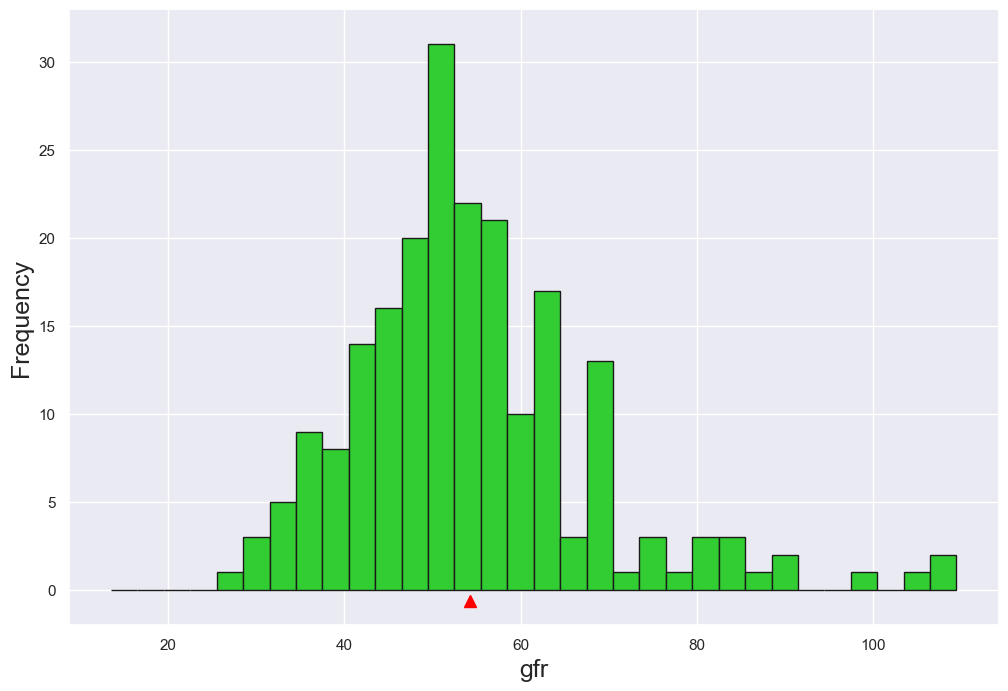

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.hist(gfr, bins=np.arange(13.5, 112, 3), edgecolor="k", color="limegreen")

ax.set_ylim(-2, 33)
ax.plot([mu_gfr], [-0.6], marker='^', markersize=9, color="red")

ax.set_xlabel("gfr", size=18)
ax.set_ylabel("Frequency", size=18);

## SECTION 1: READING THE FILE CREDSCO.TXT (load data: credit scoring)

 Reading properly a data set is non-trivial because you need to know
 its data format: decimal separator, column separator, is there a
 header? how are strings quoted? how (if any) are missing values
 coded? should character vectors be converted to factors? should
 white spaces be stripped?, ...)

 It is a good idea to consult  [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)  and play with useful control parameters.
 
 Opening the file `credsco.csv` and inspect it. Afterwards, we decide the following settings:

In [14]:
Credit = read_csv("./data/credsco.csv", header=0, delimiter=',')
Credit.shape

(4455, 14)

In [15]:
Credit.columns

Index(['Assessment', 'YearsInJob', 'Housing', 'Deadline', 'Age',
       'MaritalStatus', 'Records', 'TypeOfJob', 'Expenses', 'Income',
       'Capital', 'ChargesOnCapital', 'AmountRequested', 'MarketPrice'],
      dtype='object')

In [16]:
Credit.head()

,Assessment,YearsInJob,Housing,Deadline,Age,MaritalStatus,Records,TypeOfJob,Expenses,Income,Capital,ChargesOnCapital,AmountRequested,MarketPrice
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


 Basic questions:

* Which is the target variable? where is it? how many different values? is it a classification problem or a regression problem?

* *answers:* to start with, we will use the variable located in column 1 'Assessment' as target. It has two possible values (therefore it is a classification problem)

Here's how to interpret the meaning of categorical values

* Assessment [1, 2] ["positive","negative"]
* Housing [1,2,3,4,5,6] ["rent","owner","private","ignore","parents","other"]
* MaritalStatus [1,2,3,4,5] ["single","married","widower","split","divorced"]
* Records [1, 2] ["no","yes"]
* TypeOfJob [1,2,3,4] ["indefinite","temporal","self-employed","other"]


Let's inspect the first 4 examples

In [17]:
Credit[:4]

,Assessment,YearsInJob,Housing,Deadline,Age,MaritalStatus,Records,TypeOfJob,Expenses,Income,Capital,ChargesOnCapital,AmountRequested,MarketPrice
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325


inspect some predictive variables 4, 5, 6 and 7 (5th, 6th, 7th & 8th) for the first sample

In [18]:
Credit.iloc[0,4:8]

Age              30
MaritalStatus     2
Records           1
TypeOfJob         3
Name: 0, dtype: int64

Alternatively you can use the variable names

In [19]:
Credit.loc[0,'Age':'TypeOfJob']

Age              30
MaritalStatus     2
Records           1
TypeOfJob         3
Name: 0, dtype: int64

<div class="alert alert-success">
PLAYTIME: Practice how to check other variables, and other samples (e.g., last 10?)
</div>


In [20]:
Credit.iloc[-10:,4:8]

,Age,MaritalStatus,Records,TypeOfJob
4445,22,1,2,1
4446,50,2,2,3
4447,52,2,1,1
4448,49,2,1,1
4449,30,2,2,2
4450,39,2,1,1
4451,46,2,1,1
4452,37,2,1,2
4453,23,1,1,3
4454,32,2,1,3


***
## SECTION 2: BASIC INSPECTION OF THE DATASET

Perform a basic inspection of the dataset. Have a look at 
* minimum and maximum values
* means and deviations
* find possible abnormal values (outliers)
* find possible missing values
* decide which variables are continuous & which are categorical
* for mixed types fo one of the following
  *  recode continuous to categorical
  *  recode categorical to continuous
  *  leave them as they are (method restricted & dummy cat. to cont. code)
* See histogram

In [21]:
Credit.describe()

,Assessment,YearsInJob,Housing,Deadline,Age,MaritalStatus,Records,TypeOfJob,Expenses,Income,Capital,ChargesOnCapital,AmountRequested,MarketPrice
count,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4455.000000,4.455000e+03,4.455000e+03,4.455000e+03,4455.000000,4455.000000
mean,1.281257,7.987205,2.657015,46.441751,37.077666,1.879012,1.173513,1.675870,55.568799,7.633170e+05,1.060341e+06,4.043820e+05,1039.021773,1462.875645
std,0.450162,8.173444,1.610467,14.655225,10.984856,0.643748,0.378733,0.954035,19.515878,8.703625e+06,1.021757e+07,6.344253e+06,474.543007,628.089913
min,0.000000,0.000000,0.000000,6.000000,18.000000,0.000000,1.000000,0.000000,35.000000,0.000000e+00,0.000000e+00,0.000000e+00,100.000000,105.000000
25%,1.000000,2.000000,2.000000,36.000000,28.000000,2.000000,1.000000,1.000000,35.000000,8.000000e+01,0.000000e+00,0.000000e+00,700.000000,1117.500000
50%,1.000000,5.000000,2.000000,48.000000,36.000000,2.000000,1.000000,1.000000,51.000000,1.200000e+02,3.500000e+03,0.000000e+00,1000.000000,1400.000000
75%,2.000000,12.000000,4.000000,60.000000,45.000000,2.000000,1.000000,3.000000,72.000000,1.660000e+02,6.000000e+03,0.000000e+00,1300.000000,1692.000000
max,2.000000,48.000000,6.000000,72.000000,68.000000,5.000000,2.000000,4.000000,180.000000,1.000000e+08,1.000000e+08,1.000000e+08,5000.000000,11140.000000


 Assessment,Housing,MaritalStatus,Records,TypeOfJob are categorical and need to be treated properly

 In particular, Assessment is the target variable; we need to identify correct values

 Capital, ChargesOnCapital and Income present abnormally high maximums (99999999)

 There are also suspicious zeros in both types of variables, which we identify with missing values

In [22]:
Credit['Assessment'].value_counts()

Assessment
1    3200
2    1254
0       1
Name: count, dtype: int64

<div class="alert alert-success">
PLAYTIME: Check the value counts for the different vars. Understand the meaning of each value for each var.
</div>


Let's plot some distributions.

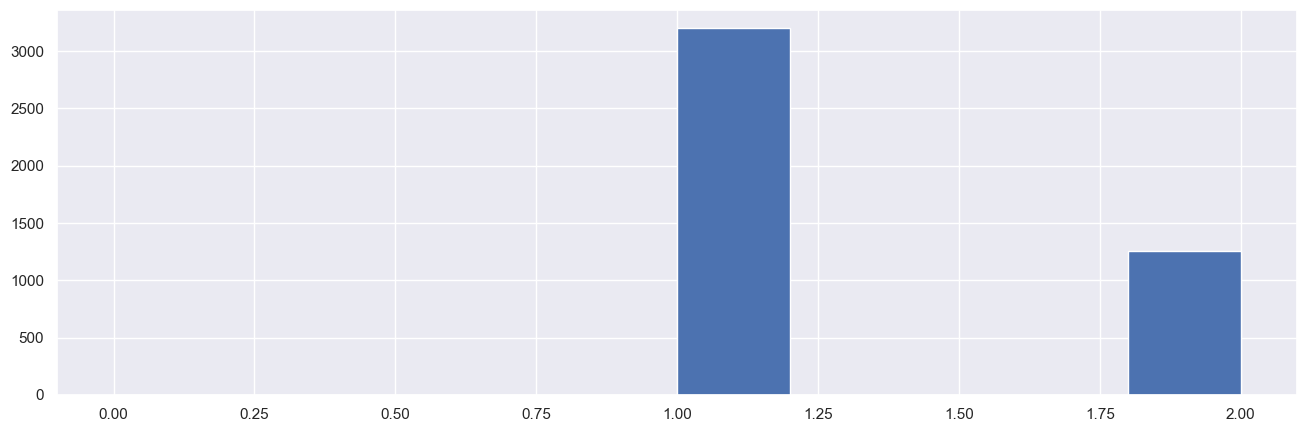

In [23]:
fig, axes= plt.subplots(1,1, figsize=(16,5))
Credit['Assessment'].hist(ax=axes);

<div class="alert alert-success">
PLAYTIME: Generate and analyze the distributions for all vars. Write down potential issues.
</div>


## A NEW DATASET  ✈ **Airline Passenger Satisfaction** ✈

 <span style="color:#A12288;"><span style="font-size:18px;">*“Once you have tasted flight, you will forever walk the earth with your eyes turned skyward, for there you have been, and there you will always long to return.”*

<span style="font-size:18px;">  – Leonardo da Vinci </span>

<span style="font-size:16px;">  The Airline industry suffered a huge setback after the pandemic, and as per ICAO, the airline industry suffered a 371 bn loss in 2020, and 329 bn with the reduced seat capacity. Hence, to revive the industry in the light of this recession, it is absolutely a necessity to understand the customer pain points, and improve their satisfaction in the services provided.</span>

![](https://honeywell.scene7.com/is/image/honeywell/AeroBT-Plane-02242020-2880x1440)

<span style="font-size:16px;">  The problem statement is to identify the key factors which lead to the satisfaction of the customer, and before diving into the data, thinking intuitively and being an avid traveller myself, from my experience, the main factors should be:
* <span style="font-size:16px;">  Delays in the flight
* <span style="font-size:16px;">  Staff efficiency to address customer needs
* <span style="font-size:16px;">  Services provided in the flight</span>

<span style="font-size:16px;">  Let us dive deep into the data to check if the data here agrees with our preliminary analysis of the possible factors

In [24]:
#Reading the data file
df = pd.read_csv('./data/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Well, we almost guessed the features right, however, we have a detailed data here with 25 features, and we will explore and play with it more, until we find the best

In [25]:
def data_explore(dataframe):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

<div class="alert alert-success">
PLAYTIME: Is a good idea create functions to apply directly to different datasets so we can call our own API to analyse different datasets.
</div>


In [26]:
data_explore(df)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (103904, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 

<span style="font-size:16px;">  Some observations about the data:
*    <span style="font-size:16px;">  The average delay in flights are 15 minutes, with a deviation of 38
*    <span style="font-size:16px;">  Median of the delays are 0, which means 50% of the flights from this data, were not delayed
*    <span style="font-size:16px;">  The count of Female passengers are more with 52727 !!

In [27]:
df['Gender'].value_counts()

Gender
Female    52727
Male      51177
Name: count, dtype: int64

<span style="font-size:16px;">  Now, as we have conducted a preliminary analysis of the data, lets segregate the features into categorical and numerical. Before that let us remove the 'Id' and 'Unnamed: 0' feature from the data

In [28]:
df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [29]:
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'object']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
********************************************************************************
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']


<div class="alert alert-success">
PLAYTIME: Obtain a list of numerical features for the same dataframe.
</div>


In [30]:
## TODO ###
# numerical_features = [...]
# print('Number of numerical variables: ', len(numerical_features))
# print('*'*80)
# print('Numerical Variables Column: ',numerical_features)

<span style="font-size:16px;">  We will visualize any specific trends in the features, and that would help us in feature selection, and better understanding of the data. Later, we will derive some useful insights from our custom made function!

<span style="color:#A12288;"><span style="font-size:18px;"><b>Visualizing Categorical Features</b>

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Gender', ylabel='count'>

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Customer Type', ylabel='count'>

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Type of Travel', ylabel='count'>

<Figure size 600x300 with 0 Axes>

<Axes: xlabel='Class', ylabel='count'>

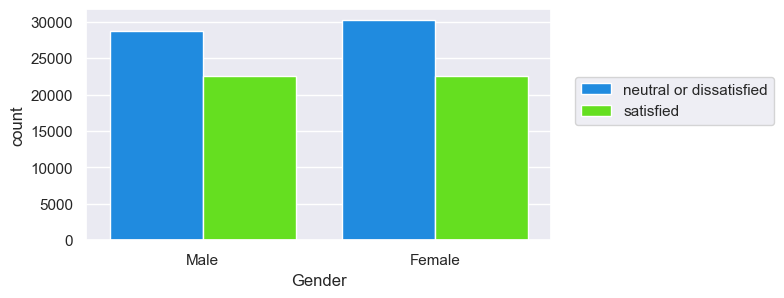

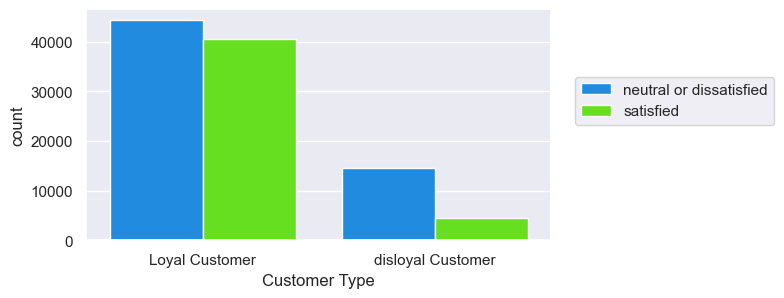

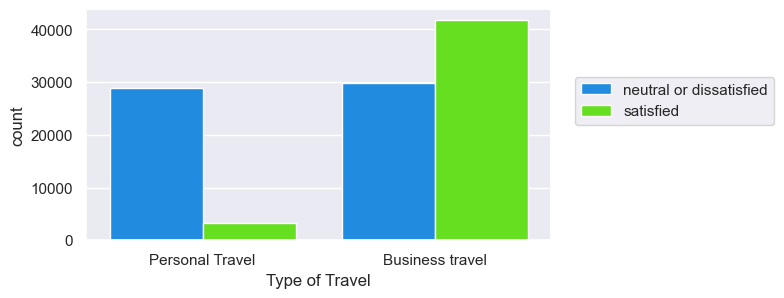

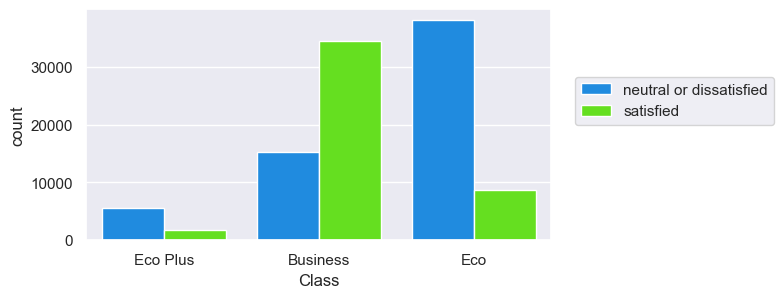

In [31]:
for col in cat_features[:-1]:
    plt.figure(figsize=(6,3), dpi=100)
    sns.countplot(data=df,x=col,hue ='satisfaction',palette='gist_rainbow_r')
    plt.legend(loc=(1.05,0.5))

<span style="font-size:16px;">  Now it's time for some insights with percent values, to back up our conclusions above

In [32]:
def get_insights(data):
    for cols in cat_features[:-1]:
        cat_group = data.groupby(cols)['satisfaction'].describe()
        percent = 100 *(cat_group['freq']/cat_group['count'])
        print('*'*70)
        print("Insights from '{}' data".format(cols))
        print('*'*70)
        for i in range(0,(len(cat_group))):
            print('{} from {} are {}'.format(round(percent[i],2),percent.index[i], cat_group['top'][i]))
        print('*'*70)

In [33]:
get_insights(df)

**********************************************************************
Insights from 'Gender' data
**********************************************************************
57.26 from Female are neutral or dissatisfied
56.05 from Male are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Customer Type' data
**********************************************************************
52.27 from Loyal Customer are neutral or dissatisfied
76.33 from disloyal Customer are neutral or dissatisfied
**********************************************************************
**********************************************************************
Insights from 'Type of Travel' data
**********************************************************************
58.26 from Business travel are satisfied
89.83 from Personal Travel are neutral or dissatisfied
************************************

<span style="font-size:16px;">  From the visualizations and insights, some points are clear:
* <span style="font-size:16px;">  Gender doesn't play an important role in the satisfaction, as men and women seems to equally concerned about the same factors
* <span style="font-size:16px;">   Number of loyal customers for this airline is high, however, the dissatisfaction level is high irrespective of the loyalty. Airline will have to work on maintaining the loyal customers
* <span style="font-size:16px;">   Business Travellers seems to be more satisfied with the flight, than the personal travellers</span>
* <span style="font-size:16px;">  People in business class seems to be the most satisfied lot, and those in economy class are least satisfied
  

<span style="font-size:16px;">  Now let's analyse the numerical features

<span style="color:#A12288;"><span style="font-size:18px;"><b>Visualizing Numerical Features</b>

In [34]:
#Plotting the barplot of numerical features
for col in numerical_features:
    plt.figure(figsize=(6,3), dpi=100)
    sns.barplot(data=df,x='satisfaction',y=col,palette='gist_rainbow_r')

NameError: name 'numerical_features' is not defined

<span style="font-size:16px;">  From the plots, it is clear that age and Gate location, does not play a huge role in flight satisfaction, and also the gender does not tell us much as seen in the earlier plot. Hence we drop these values

In [31]:
#Dropping age, gender and gate location
df.drop(['Age','Gender','Gate location'], axis=1, inplace=True)

<span style="font-size:16px;">  Let us focus now on the most important factor, we discussed ealier, which is the flight delays. Let us do an analysis of the delays, and it's relation with the satisfaction

In [ ]:
df.groupby('satisfaction')['Arrival Delay in Minutes'].mean()

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Arrival Delay in Minutes',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)

<span style="font-size:16px;">  The arrival and departure delay seems to have a linear relationship, which makes complete sense! And well, there is 1 customer who was satisfied even after a delay of 1300 minutes!!

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay in Minutes',hue='satisfaction',palette='gist_rainbow_r', alpha=0.8)
plt.ylim(0,1000)

<span style="font-size:16px;">  The most important takeaway here is the longer the flight distance, most passengers are okay with a slight delay in departure, which is a strange finding from this plot! So departure delay is less of a factor for a long distance flight, comparitively, however, short distance travellers does not seem to be excited about the departure delays, which also makes sense

## SECTION 3: DEALING WITH MISSING VALUES

Write down and document how are you dealing with missing values and why. There are several approaches
* eliminate the involved rows or columns (data loss)
* impute values (data noise)

<div class="alert alert-block alert-warning">
CAREFUL! python does not know magically which entries are missing values: they have to be explicitly declared as NA's
</div>

therefore this code is not useful:

In [ ]:
print("Before removing NA values")
Credit.shape
Credit_complete = Credit.dropna()
print("After removing NA values")
Credit_complete.shape

 the previous code does nothing! (but it seems it does)

 In the present case we have decided to perform a step-by-step treatment, separate for the categorical and continuous information

 We first decide to remove those rows with with missing values in the categorical variables (there are few)

In [40]:
(Credit.Assessment==0).value_counts()
(Credit.Housing==0).value_counts()
(Credit.MaritalStatus==0).value_counts()
(Credit.TypeOfJob==0).value_counts()

Assessment
False    4454
True        1
Name: count, dtype: int64

Housing
False    4449
True        6
Name: count, dtype: int64

MaritalStatus
False    4454
True        1
Name: count, dtype: int64

TypeOfJob
False    4453
True        2
Name: count, dtype: int64

We keep only those records that do not have a zero in those categorical variables. Now our dataset is slightly smaller.

<div class="alert alert-success">
PLAYTIME: Remove the missing values (0's) from Assessment, Housing, MaritalStatus and TypeOfJob variables by completing the next code 
</div>


In [44]:
Credit.shape
## TODO ##
Credit = Credit[(Credit['Assessment'] != 0) & 
                (Credit['Housing'] != 0) & 
                (Credit['MaritalStatus'] != 0) & 
                (Credit['TypeOfJob'] != 0)]
Credit.shape

(4455, 14)

(4446, 14)

 Process rows with missing values in the continuous variables (code 99999999)

Let's create a plot to see the distribution with and without outliers. 
The first plot is affected by the outliers. 
The second shows a clearer distribution, but is still influenced by missing values.

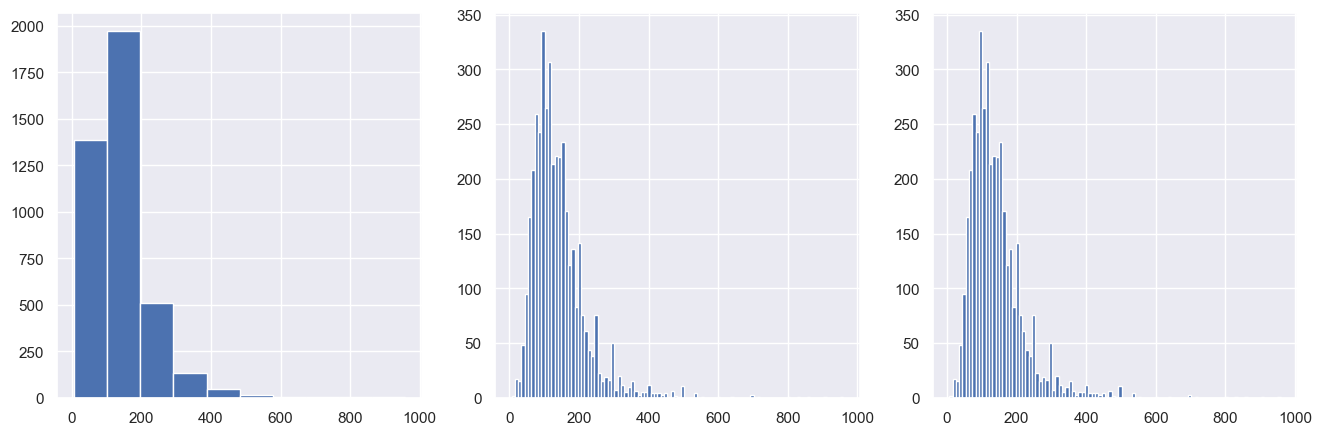

In [41]:
fig, axes= plt.subplots(1,3, figsize=(16,5))

Credit.Income.hist(ax=axes[0]);

Credit.Income[Credit.Income!=99999999].hist(ax=axes[1], bins=100);

Credit.Income[(Credit.Income!=99999999)&
              (Credit.Income!=0)].hist(ax=axes[2], bins=100);

Notice the impact of outliers and bins in a histogram!
<div class="alert alert-success">
  <strong>PLAYTIME</strong> Visualize the distributions of different variables with and without missings & outliers
</div>

In [42]:
(Credit.Income==99999999).value_counts()
(Credit.Income==0).value_counts()
(Credit.Capital==99999999).value_counts()
(Credit.ChargesOnCapital==99999999).value_counts()

Income
False    4455
Name: count, dtype: int64

Income
False    4455
Name: count, dtype: int64

Capital
False    4455
Name: count, dtype: int64

ChargesOnCapital
False    4455
Name: count, dtype: int64

 Notice in some cases a correct value may look like an outlier. Ask the data owner / domain expert to clarify. 
 Let's assume the following one is correct.

 Continuous variables have too many missing values, we can not eliminate them just like that: we must devise a treatment for these missing values

 Let's mark them to 'NA', including those from no 'Income'. Notice the changes before and after.
 
 <div class="alert alert-warning">
  <strong>Warning!</strong> After running next cells, the variable Credit is changed. If you wish to reload the original dataset, use an auxiliary variable, or re-execute from the cell on the top where the data is loaded.
</div>

In [35]:
(Credit.YearsInJob==0).value_counts()

YearsInJob
False    3920
True      535
Name: count, dtype: int64

In [38]:
Credit.Income.describe()
Credit.Income[(Credit.Income == 99999999) | (Credit.Income == 0)] = np.nan
Credit.Capital[Credit.Capital == 99999999]  = np.nan
Credit.ChargesOnCapital[Credit.ChargesOnCapital == 99999999]  = np.nan
Credit.Income.describe()

count    4.455000e+03
mean     7.633170e+05
std      8.703625e+06
min      0.000000e+00
25%      8.000000e+01
50%      1.200000e+02
75%      1.660000e+02
max      1.000000e+08
Name: Income, dtype: float64

count    4074.000000
mean      141.689249
std        80.738545
min         6.000000
25%        90.000000
50%       125.000000
75%       170.000000
max       959.000000
Name: Income, dtype: float64

<div class="alert alert-success">
  <strong>PLAYTIME</strong> Identify and fix other continuous variables
</div>

Alternatively to removing variables/instances, we can impute their values. The word 'imputation' refers to assigning a value to a missing one based on existing evidence from other samples. 
Here we perform imputation by a method known as 1NN (one nearest neighbor): for every individual with a missing 'Income', we look for the most similar individual (according to the remaining variables) and then copy its 'Income' value.
 
 As we can not have missing values in any column for computing the 1KNN we will create a training set of the imputation algorithm by dropping the columns with missing values. Then we will train and run the 1NN imputation algorithm.
 
  <div class="alert alert-warning">
  <strong>Warning!</strong> This should be done on the training partition alone, to avoid overfitting our dataset.
</div>

In [36]:
Credit.shape

(4455, 14)

In [37]:
#get the data without the columns with missings
subset_of_credit = Credit.drop(columns=['Income', 'Capital', 'ChargesOnCapital'])
subset_of_credit.shape
#get the data without the rows with missings. This will be our training set for the imputation algorithm.
credit_without_missings = subset_of_credit[Credit.Income.notna()
                                           & Credit.Capital.notna()
                                           & Credit.ChargesOnCapital.notna()]
credit_without_missings.shape
#get only the rows with missings. This is the set on which to apply inference through the imputation algorithm.
credit_where_income_has_missing_values = subset_of_credit[Credit.Income.isna()]
credit_where_income_has_missing_values.shape

(4455, 11)

(4455, 11)

(0, 11)

 Neither of credit_without_missings, credit_where_income_has_missing_values can contain NAs

In [43]:
#Define the imputation algorithm as a classifier
knn = KNeighborsClassifier(n_neighbors=1)
#Train it with the existing data. Data (all columns without missings) and labels (income column)
knn.fit(credit_without_missings, Credit.Income[Credit.Income.notna() &
                            Credit.Capital.notna() &
                            Credit.ChargesOnCapital.notna()])
#Apply it to the rows with missings
knn_inc = knn.predict(credit_where_income_has_missing_values);

ValueError: Found input variables with inconsistent numbers of samples: [4455, 4041]

In [ ]:
#Let's see the results
knn_inc

Let's do it for the other vars. First 'Capital'

In [47]:
capital_missing_values = subset_of_credit[Credit.Capital.isna()]

In [49]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(credit_without_missings, Credit.Capital[Credit.Income.notna()&
                             Credit.Capital.notna() & 
                             Credit.ChargesOnCapital.notna()])
knn_cap = knn.predict(capital_missing_values);

Then 'ChargesOnCapital'

In [50]:
charges_missing_values = subset_of_credit[Credit.ChargesOnCapital.isna()]

In [51]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(credit_without_missings, Credit.ChargesOnCapital[Credit.Income.notna()&
                                      Credit.Capital.notna() &
                                      Credit.ChargesOnCapital.notna()])
knn_cop = knn.predict(charges_missing_values);

Now we have the three columns of inputed data. We can now write it back to our original data to move forward
 
  <div class="alert alert-warning">
  <strong>Warning!</strong> Never overwrite the original dataset. Make a copy and keep track of the modifications made on it.
</div>

Once you execute this line, you wont be able to execute it again until you reload the dataset.


In [52]:
Credit_with_imputation = pd.DataFrame.copy(Credit,deep=True)
Credit_with_imputation.Income[Credit.Income.isna()] =knn_inc
Credit_with_imputation.Capital[Credit.Capital.isna()] =knn_cap
Credit_with_imputation.ChargesOnCapital[Credit.ChargesOnCapital.isna()] =knn_cop
Credit_with_imputation.ChargesOnCapital[Credit.Capital==0] = 0

There are other less computational expensive methods for missing value imputations such as replacing with mean, median or mode. All these can be computed using pandas `replace` and `fillna` functions, you can find more info [here](https://pandas.pydata.org/pandas-docs/stable/missing_data.html)

The Scikit-learn library has also a method for the most simple missing value imputation [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html)

inspect again the result, especially the new statistics

In [ ]:
Credit_with_imputation.shape
Credit_with_imputation.describe()

<div class="alert alert-success">
  <strong>PLAYTIME</strong> Impute the values using the mean estimator algorithm instead of the knn and compare the results with previous imputation
</div>

MISSING VALUES in AIRLINE dataset

<span style="font-size:16px;">  We have 310 missing values in 'Arrival delay', which is not quiet big, in terms of the data point we have, however, we'd not drop these values. And also we'd not settle with a strategy to calculate the mean, and fill in the missing values. We'd try something different here

<span style="font-size:16px;">  We are already aware that the 'Arrival time' and 'Departure Time' have a sort of linear relationship, so we'll substitute the same departure delay values to the arrival delay values, for the missing values in data points

In [54]:
#Creating a copy of the dataset, before we delete the NA values and substitute
df_copy=df.copy()

In [55]:
df_na = df[df['Arrival Delay in Minutes'].isna()] #The dataset with null values
df_copy.dropna(inplace=True) #Dropping the missing rows from copied dataset
df_na['Arrival Delay in Minutes']=df_na['Departure Delay in Minutes'] #Replacing the null dataset with Arrival delay
df_copyna = pd.concat([df_copy,df_na]) #Creating a new dataframe by combining both
df = df_copyna #Copying the values to original df

In [ ]:
df.isna().sum()

<span style="font-size:16px;">  Now we have handled the missing data!

In [ ]:
#Let's try plotting the new values
sns.scatterplot(data=df_na, x='Arrival Delay in Minutes', y='Departure Delay in Minutes')

MAPPING THE CATEGORICAL VARIABLES

<span style="font-size:16px;">  We will map the binary variables with 0 and 1, and we will use the get_dummies method for the remaining variables

In [58]:
#Mapping the values
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['Type of Travel'] = df['Type of Travel'].map({'Personal Travel':0, 'Business travel':1})

In [59]:
#Transforming the dataframe with mapped values
df=pd.get_dummies(df)

In [ ]:
#Checking the data
df.head()

In [ ]:
data_explore(df)

## SECTION 4: FINDING OUTLIERS

In real data you are usually going to find outliers. It can be because the data is just like that or because there are wrong values stored. 

It is important to identify them so you can remove them, impute them, or just acknowledge their existence and take into account in your analysis. 

Some machine learning models are very sensitive to outliers (e.g., everything based on L2 distances, or higher L). 

There are a lot of ways to define an outlier. Here we are going to do a basic fix, and point at more complex ones at the end.

In [ ]:
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
Credit.boxplot(column='MarketPrice',ax=axes[0]);
Credit.hist(column='MarketPrice', ax=axes[1]);

### IQR 

Remember:
* First quartile or Q1 is 25/75 data split
* Third quartile or Q3 75/25 data split

One easy criteria to decide which values are outliers is to use the distance between quartiles. Specifically, you define the outliers as: 
* The values smaller than Q1 - 1.5*IQR
* The values bigger than Q3 + 1.5*IQR



This is the criteria used in the boxplots to marc the outliers. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1024px-Boxplot_vs_PDF.svg.png" alt="nice_image_from_wikipedia" width="450"/>

If we used this criteria to remove the outliers of our variable we would get the next distribution.

In [ ]:
Q1 = Credit['MarketPrice'].quantile(0.25)
Q3 = Credit['MarketPrice'].quantile(0.75)
IQR = Q3 - Q1
#Statistics
Q1, Q3, IQR
#Cutting point values for this var
print('Below this market price, I\'m assuming everything is an outlier:', Q1 - (1.5*IQR))
print('Abovr this market price, I\'m assuming everything is an outlier:', Q3 + (1.5*IQR))


In [ ]:
#Let's get the list of samples that are below and above the thresholds
small_outliers = Credit['MarketPrice'] < (Q1 - 1.5 * IQR)
big_outliers = Credit['MarketPrice'] > (Q3 + 1.5 * IQR)

sum(small_outliers), sum(big_outliers)

In [ ]:
#See first and last instances
Credit['MarketPrice'][small_outliers]
Credit['MarketPrice'][big_outliers].head()
Credit['MarketPrice'][small_outliers | big_outliers].tail()
#Notice the particular syntax in the two last lines. What does it do?

In [ ]:
#Let's plot again, now without outliers.
fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
Credit[~(small_outliers | big_outliers)].boxplot(column='MarketPrice',ax=axes[0]);
Credit[~(small_outliers | big_outliers)].hist(column='MarketPrice', ax=axes[1]);

### Model based
Sometimes the classic approaches will not be enough to detect outliers. The data can take many forms, like images, text or yust pairs of variables that would not make sense to take independenly for any reason. 

In these cases we will want to use more complex approaches. Here we will not get into further detail, since other courses do, but consider this approach as an alternative [Local Outlier Factor](https://dl.acm.org/doi/abs/10.1145/342009.335388). Local outlier factor uses the local density of a point to decide if it is an otlier or it is not. The local density is calculated by using its k nearest neighbors. 

***
## SECTION 5: TREATMENT OF MIXED DATA TYPES


 In this case we have decided to keep the original type and leave the decision for later, depending on the specific analysis

 we explicitly declare categorical variables as such 

In [ ]:
Credit_with_imputation.dtypes

In [ ]:
# There is a categorical datatype in pandas, but for most things this will do
Credit_with_imputation.Assessment = Credit_with_imputation.Assessment.astype('object')
Credit_with_imputation.Housing = Credit_with_imputation.Housing.astype('object')
Credit_with_imputation.MaritalStatus = Credit_with_imputation.MaritalStatus.astype('object')
Credit_with_imputation.Records = Credit_with_imputation.Records.astype('object')
Credit_with_imputation.TypeOfJob = Credit_with_imputation.TypeOfJob.astype('object')

Credit_with_imputation.Assessment.unique()
Credit_with_imputation.Housing .unique()
Credit_with_imputation.MaritalStatus.unique()
Credit_with_imputation.Records.unique()
Credit_with_imputation.TypeOfJob.unique()


not very nice, right? let's recode

In [71]:
Credit_with_imputation.Assessment.replace([1, 2], 
                          ["positive","negative"], 
                          inplace=True)
Credit_with_imputation.Housing.replace([1,2,3,4,5,6], 
                       ["rent","owner","private","ignore","parents","other"], 
                       inplace=True)
Credit_with_imputation.MaritalStatus.replace([1,2,3,4,5], 
                             ["single","married","widower","split","divorced"], 
                             inplace=True)
Credit_with_imputation.Records.replace([1, 2], 
                       ["no","yes"], inplace=True)
Credit_with_imputation.TypeOfJob.replace([1,2,3,4], 
                         ["indefinite","temporal","self-employed","other"], 
                         inplace=True)


In [ ]:
Credit_with_imputation.dtypes
Credit_with_imputation.Assessment.unique()
Credit_with_imputation.Housing .unique()
Credit_with_imputation.MaritalStatus.unique()
Credit_with_imputation.Records.unique()
Credit_with_imputation.TypeOfJob.unique()

<div class="alert alert-block alert-warning">
If you want to treat a categorical variable as numerical, generally you should avoid replace the categories by numbers. 
If you do so you are adding an order relationship that did not exist previously in the data, adding noise to your analysis. 
</div>

***
## SECTION 6: DERIVATION OF NEW VARIABLES: FEATURE EXTRACTION

 We decide whether it can be sensible to derive new variables; we extract two new continuous and one new categorical variable (for the sake of illustration):

 Financing ratio (continuous) and Saving capacity (continuous)


In [ ]:
fig, axes = plt.subplots(1,2,figsize=(14,4));

Credit_with_imputation['FinancingRatio'] = 100*Credit_with_imputation.AmountRequested/Credit_with_imputation.MarketPrice
Credit_with_imputation.FinancingRatio.hist(ax=axes[0]);
axes[0].set_title('Financing Ratio');


Credit_with_imputation['SavingCapacity'] = (Credit_with_imputation.Income- Credit_with_imputation.Expenses-(Credit_with_imputation.ChargesOnCapital/100))\
                            /(Credit_with_imputation.AmountRequested/Credit_with_imputation.Deadline)
Credit_with_imputation.SavingCapacity.hist(bins=16,ax=axes[1]);

axes[1].set_title('Saving Capacity');


 Amount Requested greater than the median by people younger than 1.25 times the mean (categorical):

In [ ]:
Credit_with_imputation['Dubious'] = ['No']*Credit_with_imputation.shape[0]
Credit_with_imputation.Dubious[(Credit_with_imputation.AmountRequested > Credit_with_imputation.AmountRequested.median(skipna=True)) &
               (Credit_with_imputation.Age < 1.25*Credit_with_imputation.Age.mean(skipna=True))] = "Yes"
pd.crosstab(Credit_with_imputation.Dubious, Credit_with_imputation.Assessment)

***
## SECTION 7: WHAT WE HAVE DONE SO FAR


 Create a new dataframe that gathers everything and inspect it again

In [ ]:
Credit_new = Credit.copy()
                   
Credit_new.describe(include='all')
Credit_new.shape


## SECTION 8: VISUALIZING OUR DATA

Usually it is a good idea to perform a visualization of your variables, so you can notice possible errors or patterns on your data. For doing so, you can use:

- Numerical variables: Boxplot or histograms
- Categorical variables:  Frequency tables, Contingency tables, Bar charts or Pie charts 

### Numerical Variables

Lets see first how our numerical variables look. 


In [ ]:
numerical_columns = categorical_variables = Credit_new.dtypes[Credit_new.dtypes!='object'].index
Credit_new.loc[:, numerical_columns].boxplot(figsize=(16, 5));

In this plot we can see that there is a huge difference between the variables ranges, and that some of our variables have a huge queue. 

In [ ]:
Credit_new.loc[:,numerical_columns].boxplot(figsize=(16,5),showfliers=False); # much better, but would be nicer one by one

If we plot without the outliers in terms of IQR range we can see a bit better our variables, but there is still a lot of difference between the ranges of our variables and still we can not fully see our variables shape. These are indicators that our data would benefit from some transformations.



#### Gaussianity
Some models will benefit or need that your numerical variables are normally shaped. You can use a kernel density estimation plot to check your numerical variables for gaussianity.

In [ ]:
sigma=  Credit_new.Expenses.std()
mu=  Credit_new.Expenses.mean()
fig, ax = plt.subplots(figsize=(6,4))
count, bins, ignored = plt.hist(Credit_new.Expenses, 15, density=True)
dbins = np.linspace(bins[0], bins[-1])
plt.title("Expenses")
ax.set_xlabel("Expenses")
plt.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (dbins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r');

In [ ]:
fig = plt.figure(figsize=(12,12))
for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    Credit_new[Credit.columns[i+8]].plot.kde()
    plt.title(Credit.columns[i+8])
fig.tight_layout();


### Categorical Variables
Now lets see how our categorical variables look like. 

In [ ]:
categorical_variables

<div class="alert alert-success">
PLAYTIME: Plot the categorical variables as in the Airline Passenger Dataset.
</div>


In [ ]:
categorical_variables = Credit_new.dtypes[Credit_new.dtypes=='object'].index

fig, axes = plt.subplots(2,3,figsize=(13,8));

for i, c in enumerate(categorical_variables):
    if c =='y':
        continue
    ax = axes.reshape(-1)[i];
    sns.countplot(Credit_new[c],ax=ax);
    t = ax.set_title(c);
plt.tight_layout();

From this plot we can see that some categories are strongly under-represented. That could suppose a problem in some cases so it is good to know it. 

### Comparing variables

We can also use visualizations for comparing two variables. 

For comparing two numerical variables we will usually use a scatterplot.In a scatter plot we will see a direct relationship between to variables if the points are close to the diagonal line starting on (0,0). 

In [ ]:
Credit_new.plot.scatter(y='Capital',
                        x='AmountRequested', 
                        title='Amount req. vs. Capital');

For comparing two categorical variables we can use a frequency table, which can help us do several useful plots.

In [ ]:
type_of_job_vs_assesement = pd.crosstab(
    Credit_new.TypeOfJob,
    Credit_new.Assessment,
    # normalize=True,   ## If we want to see frequencies instead of raw counts we can also normalize by index and columns
    # margins=True,     ## If we want to see total by axis
    )

type_of_job_vs_assesement_normalized_by_cols = pd.crosstab(
    Credit_new.TypeOfJob,
    Credit_new.Assessment,
    normalize='columns'
    )

type_of_job_vs_assesement.T

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(12,12));

type_of_job_vs_assesement.T.plot.bar(stacked=True, ax=axes[0,0]);  
axes[0,0].set_title('Stacked bar chart');

type_of_job_vs_assesement_normalized_by_cols.T.plot.bar(stacked=True,ax=axes[0,1]);
axes[0,1].set_title('Stacked bar chart normalized');


type_of_job_vs_assesement_normalized_by_cols.T.plot.bar(ax=axes[1,0]);
axes[1,0].set_title('Grouped bar chart');


sns.heatmap(type_of_job_vs_assesement,annot=True, fmt="d", cmap='coolwarm')
axes[1,1].set_title('Heatmap');


## SECTION 9: TRANSFORMATIONS

Most models can only work with numerical data. That implies that most of the time we will need to transform categorical variables into numerical ones. On the other hand, sometimes you might benefit from categorizing a numerical variable. 

### Transform numerical variables into categorical

Sometimes it can be interesting to describe the behavior of a population by age group. As people from the same age group might behave similarly depending on the context. Lets try to categorize our age variable and compare it to other variables. 

In [ ]:
Credit_new.Age.describe()

For doing so, we need to define a set of bins where the samples will be categorized into. We can use pd.interval_range to do it.

In [ ]:
age_groups = pd.interval_range(start=15, end=80,freq=10)
age_groups

In [ ]:
age_group_column = pd.cut(Credit_new.Age, bins=pd.interval_range(start=15, end=80,freq=10))  
age_group_column

In [ ]:
Credit_new['Age_cat'] = age_group_column.astype('str')
Credit_new.Age_cat.value_counts().sort_index()

Now we can use this new variable for our analysis. For example, we can compare it with other variables in our data. A crosstab is a very useful tool for comparing categorical variables. 

In [ ]:
TypeOfJob_Age= pd.crosstab(Credit_new.TypeOfJob, 
                           Credit_new.Age_cat,
#                           normalize=True, ## If we want to see frequencies instead of raw counts we can also normalize by index and columns
#                           margins=True,     ## If we want to see total by axis
                          )
TypeOfJob_Age

If we perform the visualizations seen on the previous section we can see interesting patterns.

In [ ]:
fig, axes = plt.subplots(2,2,figsize=(16,16));

TypeOfJob_Age.T.plot.bar(stacked=True, ax=axes[0,0]);  
axes[0,0].set_title('Stacked bar chart');

pd.crosstab(Credit_new.TypeOfJob, 
            Credit_new.Age_cat,
            normalize="columns").T.plot.bar(stacked=True,ax=axes[0,1]);
axes[0,1].set_title('Stacked bar chart normalized');


pd.crosstab(Credit_new.TypeOfJob, 
            Credit_new.Age_cat,
            normalize="columns").T.plot.bar(ax=axes[1,0]);
axes[1,0].set_title('Grouped bar chart');


sns.heatmap(TypeOfJob_Age, annot=True, fmt="d", cmap='coolwarm')
axes[1,1].set_title('Heatmap');


###  Transform categorical variables into numerical: One hot encoding (dummy encoding)

Sometimes you will want to treat some (of all) your categorical variables as numerical. This can happen if, for example you want to train a model that does not accept categorical variables. 
There are different methods to codify the categories. One of the most simple and commonly used is one hot encoding.  

Let's see how `Records` variable is transformed using this method.

In [ ]:
Credit['Records'].head()

In [ ]:
pd.get_dummies(Credit['Records'], prefix='Records').head()

 do any of the continuous variables "look" Gaussian? 
 features to look for in comparing to a Gaussian: outliers, asymmetries, long tails

## SECTION:9 NORMALIZATION

If you try to train a model with varaibles of ranges too far away it will be a disaster most of the times. Becasue the model might only "see" the bigger variable. 

To avoid this issue you usualy normalize or standarize your data. This way you force all your variables to have the same range. 
There are models that are very sensitive to this and might even fail to converge if you don't normalize your data. 

The most comon transformations for normalizing the data are: 
* Standarization: $\frac{X - \mu}{\sigma}$ will trasnform your data so it has mean 0 and std 1.
* Min-max scaling: $\frac{X - X_{min}}{X_{max} - X_{min}}$ will send your data to the range [0,1]
* Boxcox transformation: $\frac{X^\lambda - 1}{ \lambda}$ if $\lambda \neq 0$ or $ln(X)$ if $\lambda = 0$ transforms the data to try to fit a normal distribution. 


Another transformation that is commonly used is the log transformation.

In [ ]:
Credit_new[['Age', 'MarketPrice']].describe()

In [102]:
min_max_scaler =  preprocessing.MinMaxScaler()
Credit_new[['Age_min_max', 'MarketPrice_min_max']] = min_max_scaler.fit_transform(Credit_new[['Age', 'MarketPrice']])
std_scaler = preprocessing.StandardScaler()
Credit_new[['Age_std','MarketPrice_std']]= preprocessing.scale(Credit_new[['Age', 'MarketPrice']])

x, _= boxcox(Credit_new['Age'])
Credit_new['Age_bx'] = x

x, _= boxcox(Credit_new['MarketPrice'])
Credit_new['MarketPrice_bx'] = x

In [ ]:
Credit_new[['Age_min_max', 'MarketPrice_min_max','Age_std', 'MarketPrice_std', 'Age_bx','MarketPrice_bx']].describe()

In [ ]:
Credit_new[['Age','Age_min_max', 'Age_std', 'Age_bx']].hist(figsize=(14,4), layout=(1,4));

In [ ]:
Credit_new[['MarketPrice','MarketPrice_min_max', 'MarketPrice_std', 'MarketPrice_bx']].hist(figsize=(14,4), layout=(1,4));

extra plot boxcox transformation: 

In [ ]:
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(1, 2, 1)
Credit_new.Age.plot.hist(title='Look at that ...')

# the boxcox function transforms the data using 
# the power transformation (x**lambda -1)/ lambda
# the function takes care of finding the optimal lambda
x, _= boxcox(Credit.Age+1)

Credit_new['Age_BC'] = x
ax = fig.add_subplot(1, 2, 2)
Credit_new.Age_BC.plot.hist(title='Look at that now ...');

### Log transform
Lets see first `Capital` variable: Here we have a variable with positive or zero values, huge range and a huge queue. A variable of this kind might benefit from a log transformation.

In [ ]:
fig, axes= plt.subplots(1,2, figsize=(12,5))
Credit_new.Capital.hist(bins=20, color='red', ax=axes[0]);
axes[0].set_title('Capital without transformation');

my_log = lambda x: np.log10(x+0.01)

Credit_new.Capital.apply(my_log).hist(bins=20, color='red', ax=axes[1]);
axes[1].set_title('Capital log transformation');


We can see that a lot of samples have 0 capital. To avoid our logarithm to have infinite value for those samples, we can add an small amount to all of them, but that will affect our result transformation, as you can see on the plot. In a case like this, we would use our knowledge on our data to decide what to do with these zeros. 

## SECTION 10: ENDING THE PREPROCESSING

  
 Shuffle the data (to avoid possible ordering biases)

In [108]:
np.random.seed(144)
Credit_new = Credit_new.sample(frac=1).reset_index(drop=True)

 
 Save the preprocessed data into a file for future use
<div class="alert alert-block alert-warning">
Pandas allows to save the data in a lot of different formats as you can see [here](http://pandas-docs.github.io/pandas-docs-travis/io.html) among others CSV, pickle, HDF5, JSON, Excel as well as other data storages like SQL databases, Google Big Query, parquet or feather.

The simplest way is to save the data as a csv with `to_csv` or as a pickle file (native python store format) with `to_pickle`, this last one allows also to compress the data.
</div>


In [109]:
Credit_new.to_pickle('Credsco-processed.pkl.bz2',compression='bz2')

In [ ]:
Credit_load =pd.read_pickle('Credsco-processed.pkl.bz2',compression='bz2')
Credit_load.head()